## 🎮 VIDEO GAMES SALES ANALYSIS

<Figure size 1300x600 with 0 Axes>

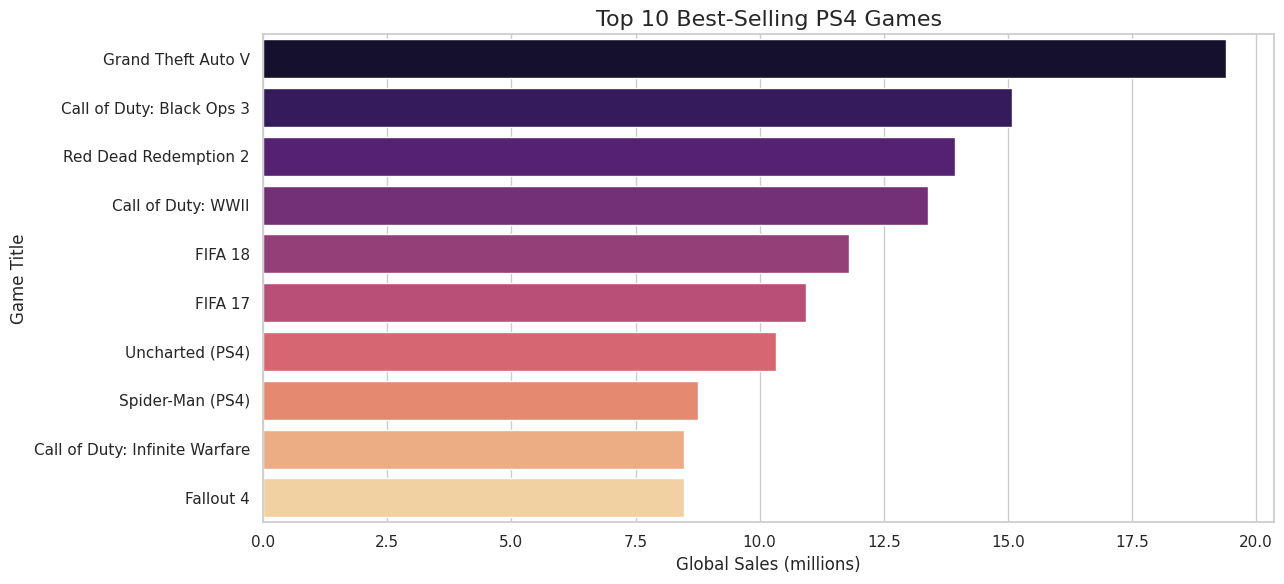

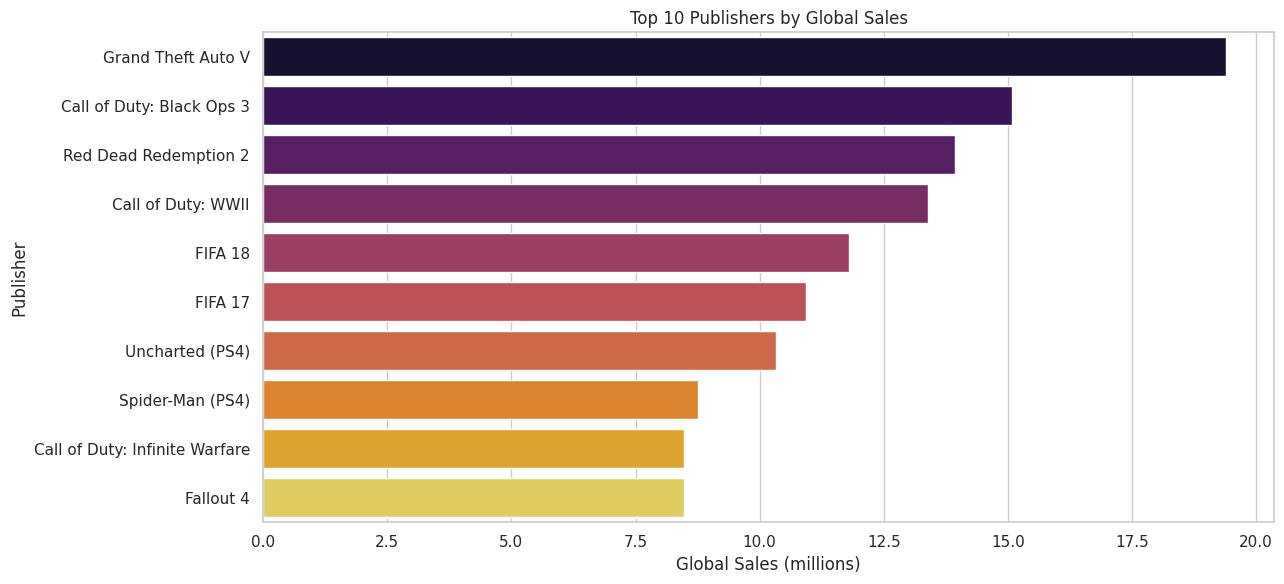

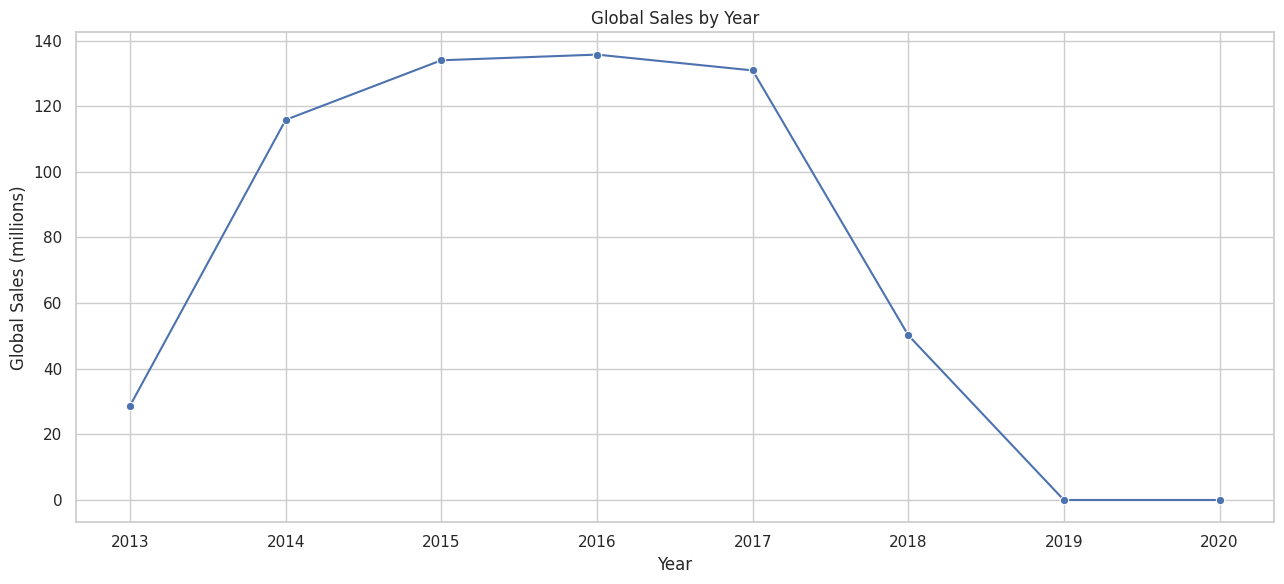

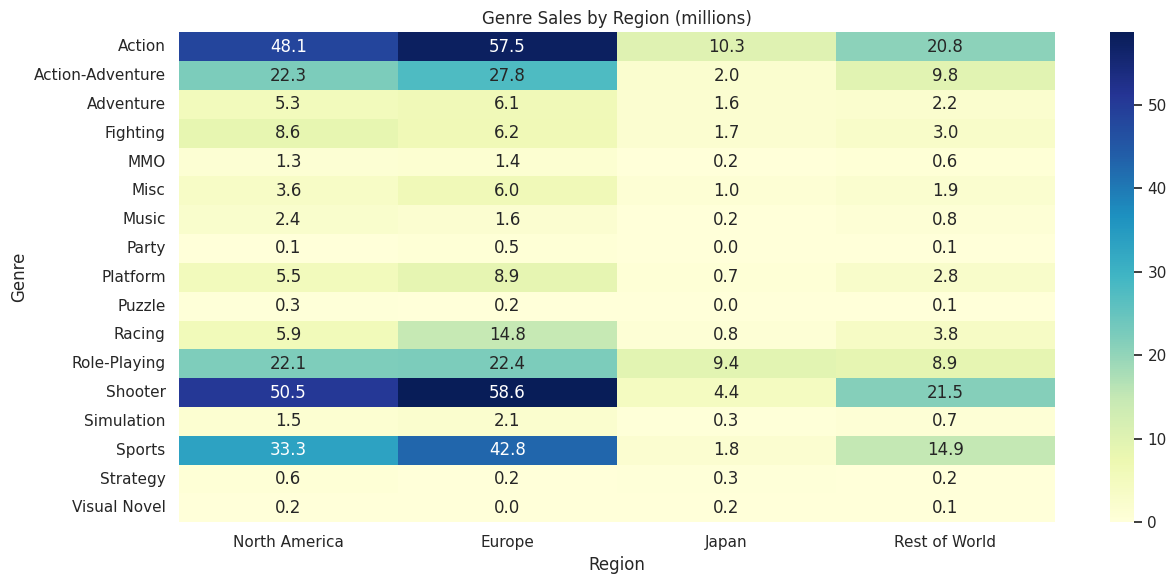

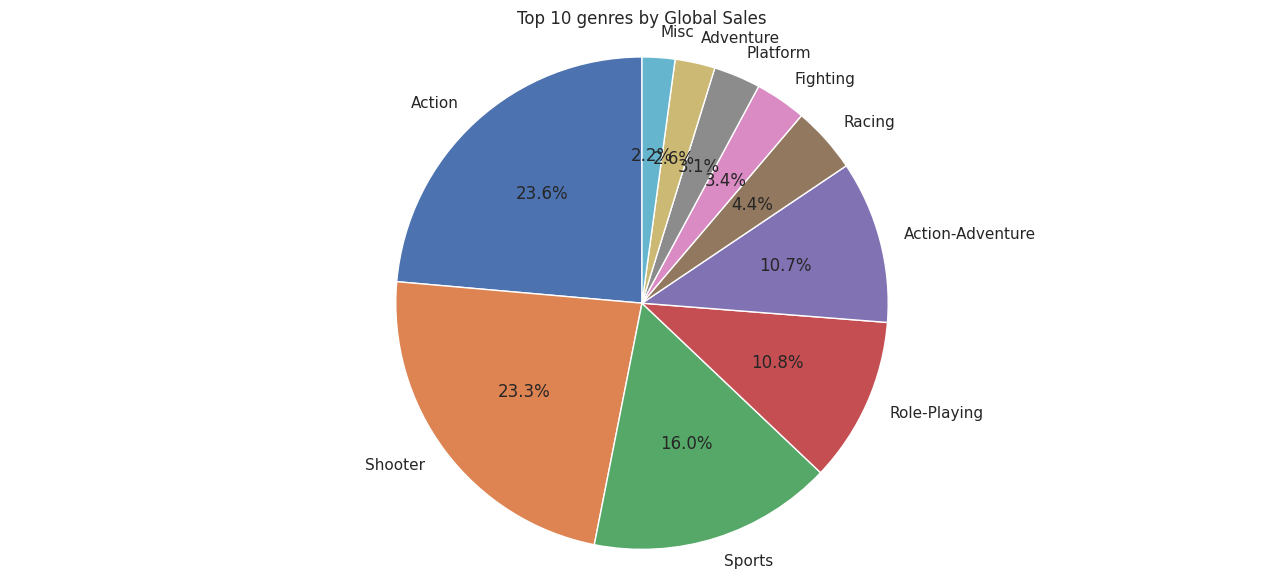

,Summary
0,✅ VIDEO GAMES SALES ANALYSIS This data-driven approach helped uncover valuable insights into: • Consumer preferences by region • Top-performing publishers and genres • Market dynamics over time


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('PS4_GamesSales.csv', encoding='latin1')
df.head()
df.columns
plt.figure(figsize=(13,6))

from IPython.display import Markdown, display

display(Markdown("## 🎮 VIDEO GAMES SALES ANALYSIS"))





top_10_games = df.sort_values(by='Global', ascending = False ).head(10)

plt.figure(figsize=(13,6))
sns.barplot(x='Global', y='Game', data=top_10_games, hue='Game', palette='magma', legend=False)
plt.title('Top 10 Best-Selling PS4 Games', fontsize=16)
plt.xlabel('Global Sales (millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.tight_layout()
plt.show()

df.columns

top_publishers = df.groupby('Publisher')['Global'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(13,6))
sns.barplot(x='Global', y='Game', data=top_10_games, hue='Game', palette='inferno', legend=False)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


sales_by_year = df.groupby('Year')['Global'].sum().reset_index()

plt.figure(figsize=(13,6))
sns.lineplot(x='Year', y='Global', data=sales_by_year, marker='o')
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.tight_layout()
plt.show()

genre_region = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

plt.figure(figsize=(13,6))
sns.heatmap(genre_region, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Genre Sales by Region (millions)')
plt.ylabel('Genre')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(13,6))
genre_sales = df.groupby('Genre')['Global'].sum().reset_index()
top_genres = genre_sales.sort_values(by='Global', ascending=False).head(10)
plt.pie(top_genres['Global'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 genres by Global Sales')
plt.axis('equal')
plt.tight_layout()
plt.show()

sns.set(style="whitegrid")

import pandas as pd
from IPython.core.display import HTML
HTML("<style>.dataframe { width: 800px !important; }</style>")


# Create a DataFrame with a single cell containing the summary text
TOPIC_1 = pd.DataFrame({
    'Summary': [
        """✅ VIDEO GAMES SALES ANALYSIS

This data-driven approach helped uncover valuable insights into:

• Consumer preferences by region
• Top-performing publishers and genres
• Market dynamics over time"""
    ]
})

# Apply custom styling
TOPIC_1.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'left',
    'font-family': 'Arial',
    'white-space': 'pre-wrap'  # preserves line breaks in notebook render
})









In [ ]:
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin1')
df.head()
df.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [ ]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=d35719ec1b24059140542e367c896f43537678249ba30a8b4996b67005450ec5
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [ ]:
import pandas as pd
import pandasql as psql

df =pd.read_csv('PS4_GamesSales.csv', encoding='latin1')
df.head()

query = "SELECT * from df WHERE `global` > 12"
result = psql.sqldf(query,locals())
print(result)



                        Game    Year             Genre       Publisher  \
0         Grand Theft Auto V  2014.0            Action  Rockstar Games   
1  Call of Duty: Black Ops 3  2015.0           Shooter      Activision   
2      Red Dead Redemption 2  2018.0  Action-Adventure  Rockstar Games   
3         Call of Duty: WWII  2017.0           Shooter      Activision   

   North America  Europe  Japan  Rest of World  Global  
0           6.06    9.71   0.60           3.02   19.39  
1           6.18    6.05   0.41           2.44   15.09  
2           5.26    6.21   0.21           2.26   13.94  
3           4.67    6.21   0.40           2.12   13.40  


In [ ]:
import pandas as pd
import pandasql as psql

df =pd.read_csv('PS4_GamesSales.csv', encoding='latin1')
df.head()

query = "SELECT game,  `global` from df ORDER BY `global` DESC LIMIT 10"
result = psql.sqldf(query,locals())
print(result)

                             Game  Global
0              Grand Theft Auto V   19.39
1       Call of Duty: Black Ops 3   15.09
2           Red Dead Redemption 2   13.94
3              Call of Duty: WWII   13.40
4                         FIFA 18   11.80
5                         FIFA 17   10.94
6                 Uncharted (PS4)   10.33
7                Spider-Man (PS4)    8.76
8  Call of Duty: Infinite Warfare    8.48
9                       Fallout 4    8.48


In [ ]:
import pandas as pd
import pandasql as psql

df =pd.read_csv('PS4_GamesSales.csv', encoding='latin1')
df.head()

query = "SELECT global ,  `Year` from df group by Year order by Year "
result = psql.sqldf(query,locals())
print(result)

   Global    Year
0    0.10     NaN
1    4.17  2013.0
2   19.39  2014.0
3   15.09  2015.0
4   10.94  2016.0
5   13.40  2017.0
6   13.94  2018.0
7    0.00  2019.0
8    0.00  2020.0


In [ ]:
import pandas as pd
import pandasql as psql

df =pd.read_csv('PS4_GamesSales.csv', encoding='latin1')
df.head()

query = "SELECT  `genre`,`North America`,`Japan` ,`Europe`,`Rest of World`,sum(`North America`+ `Europe`+`Japan`+ `Rest of World`) as total_regional_sales  from df group by genre order by genre "
result = psql.sqldf(query,locals())
print(result)

               Genre  North America  Japan  Europe  Rest of World  \
0             Action           6.06   0.60    9.71           3.02   
1   Action-Adventure           5.26   0.21    6.21           2.26   
2          Adventure           0.61   0.05    1.08           0.32   
3           Fighting           1.94   0.00    0.94           0.61   
4                MMO           0.74   0.00    0.98           0.33   
5               Misc           1.89   0.35    3.13           0.96   
6              Music           0.52   0.00    0.49           0.20   
7              Party           0.05   0.00    0.47           0.09   
8           Platform           1.09   0.07    2.92           0.74   
9             Puzzle           0.11   0.00    0.09           0.04   
10            Racing           0.63   0.24    2.35           0.54   
11      Role-Playing           2.91   0.27    3.97           1.34   
12           Shooter           6.18   0.41    6.05           2.44   
13        Simulation           0.4

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('PS4_GamesSales.csv', encoding='latin1')

global_sales = df['Global'].values

average_global_sales = np.mean(global_sales)

print("Average Global Sales:", round(average_global_sales, 2))


Average Global Sales: 0.58


In [ ]:
avg_na = np.mean(df['North America'].values)

avg_eu = np.mean(df['Europe'].values)

print(f"Avg NA Sales: {avg_na:.2f} | Avg EU Sales: {avg_eu:.2f}")


Avg NA Sales: 0.20 | Avg EU Sales: 0.25


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('PS4_GamesSales.csv', encoding = 'latin')

action_sales = df[df['Genre'] == 'Action']['Global'].values

avg_action_sales = np.mean(action_sales)

print(f"Average Global Sales for Action Genre: {avg_action_sales: .2f} million")


Average Global Sales for Action Genre:  0.53 million
